In [1]:
import os
import cv2
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = os.listdir('dataset_local/AP/train/')
valid = os.listdir('dataset_local/AP/valid/')

In [3]:
df = pd.read_csv("dataset/all_data_5_fold.csv")
print(df.shape[0] / 4)
df_fns = pd.Series(df['#filename'].unique())
df.head()

1178.0


,#filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,fold
0,patient00007_study2_negative_image4.png,61041,{},4.0,0.0,"{""name"":""point"",""cx"":269,""cy"":152}",{},2
1,patient00007_study2_negative_image4.png,61041,{},4.0,1.0,"{""name"":""point"",""cx"":274,""cy"":91}",{},2
2,patient00007_study2_negative_image4.png,61041,{},4.0,2.0,"{""name"":""point"",""cx"":217,""cy"":65}",{},2
3,patient00007_study2_negative_image4.png,61041,{},4.0,3.0,"{""name"":""point"",""cx"":187,""cy"":122}",{},2
4,patient00058_study2_negative_image1.png,84635,{},4.0,0.0,"{""name"":""point"",""cx"":189,""cy"":212}",{},3


In [4]:
df_fns.isin(train).sum(), df_fns.isin(valid).sum(), len(train), len(valid)

(1178, 0, 2173, 146)

In [6]:
excluded = [fn for fn in train if fn not in df_fns.values]
len(excluded)

995

1. patient02603_study1_negative_image2.png
2. patient02504_study1_negative_image4.png
3. patient02296_study1_negative_image2.png
4. patient02365_study1_negative_image3.png
5. patient01657_study1_negative_image2.png
6. patient02541_study1_negative_image1.png
7. patient01987_study1_negative_image4.png
8. patient01960_study1_negative_image3.png
9. patient02562_study1_negative_image1.png
10. patient02066_study1_negative_image1.png
11. patient01539_study1_negative_image2.png
12. patient02032_study1_negative_image5.png
13. patient01451_study1_negative_image3.png
14. patient02081_study1_negative_image4.png
15. patient02051_study1_negative_image2.png
16. patient01672_study1_negative_image3.png


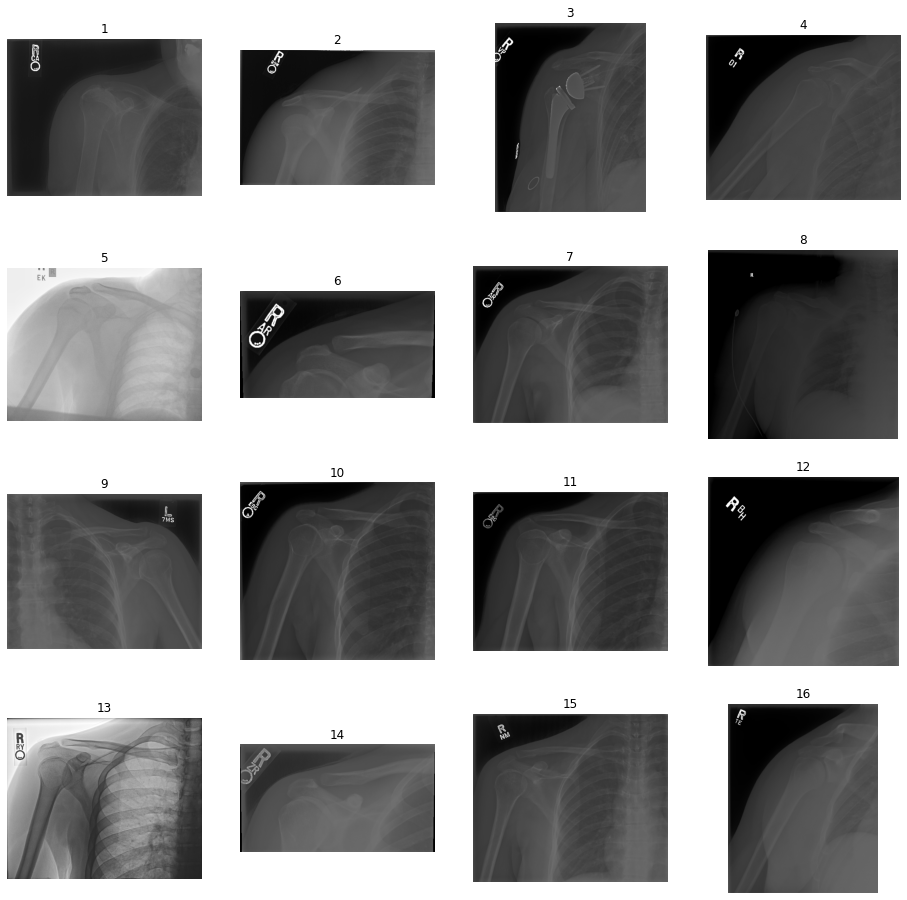

In [76]:
selected = np.random.choice(excluded, 16, replace=False)

fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for i, (path, ax) in enumerate(zip(selected, axes.flatten())):
    img = cv2.imread('dataset_local/AP/train/' + path)[..., ::-1]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(i+1)
    print(f"{i+1}. {path}")
plt.show()

In [9]:
!mkdir dataset_local/AP/excluded

In [83]:
exc_selection = ['patient02123_study1_negative_image4.png',
'patient02103_study1_negative_image2.png',
'patient01434_study1_negative_image2.png',
'patient01680_study2_negative_image4.png',
'patient01641_study2_negative_image3.png',
'patient01578_study1_negative_image2.png',
'patient02661_study1_negative_image3.png',
'patient02266_study1_negative_image2.png',
'patient02306_study1_negative_image3.png',
'patient01968_study1_negative_image4.png',
'patient01892_study1_negative_image3.png',
'patient02283_study1_negative_image2.png',
'patient02393_study1_negative_image1.png',
'patient01453_study1_negative_image4.png',
'patient02036_study1_negative_image2.png',
'patient02365_study1_negative_image3.png',
'patient02047_study1_negative_image2.png',
'patient02113_study1_negative_image1.png',
'patient00921_study2_negative_image1.png',
'patient02444_study1_negative_image4.png',
'patient02455_study1_negative_image1.png',
'patient01658_study1_negative_image4.png',
'patient01984_study1_negative_image2.png',
'patient02282_study1_negative_image1.png',
'patient02230_study1_negative_image2.png',
'patient01884_study1_negative_image4.png',
'patient01493_study1_negative_image1.png',
'patient01458_study1_negative_image1.png',
'patient01948_study1_negative_image2.png',
'patient01865_study1_negative_image2.png',
'patient02313_study1_negative_image1.png',
'patient02394_study1_negative_image1.png',
'patient02603_study1_negative_image2.png',
'patient00813_study2_negative_image4.png',
'patient01672_study1_negative_image3.png',
'patient02081_study1_negative_image4.png',
'patient01451_study1_negative_image3.png',
'patient02032_study1_negative_image5.png',
'patient02066_study1_negative_image1.png',
'patient01960_study1_negative_image3.png',
'patient02541_study1_negative_image1.png',
'patient02296_study1_negative_image2.png',]

In [10]:
for path in excluded:
    shutil.copy('dataset_local/AP/train/' + path, f'dataset_local/AP/excluded/{path}')

1. patient01580_study1_negative_image3.png
2. patient02616_study1_negative_image3.png
3. patient02054_study1_negative_image3.png
4. patient02634_study1_negative_image1.png
5. patient01812_study1_negative_image2.png
6. patient02548_study1_negative_image1.png
7. patient02082_study1_negative_image1.png
8. patient02508_study1_negative_image1.png
9. patient01999_study1_negative_image2.png
10. patient01465_study2_negative_image1.png
11. patient02688_study1_negative_image1.png
12. patient01601_study1_negative_image4.png
13. patient02379_study1_negative_image3.png
14. patient02454_study1_negative_image1.png
15. patient02040_study1_negative_image1.png
16. patient02235_study1_negative_image4.png


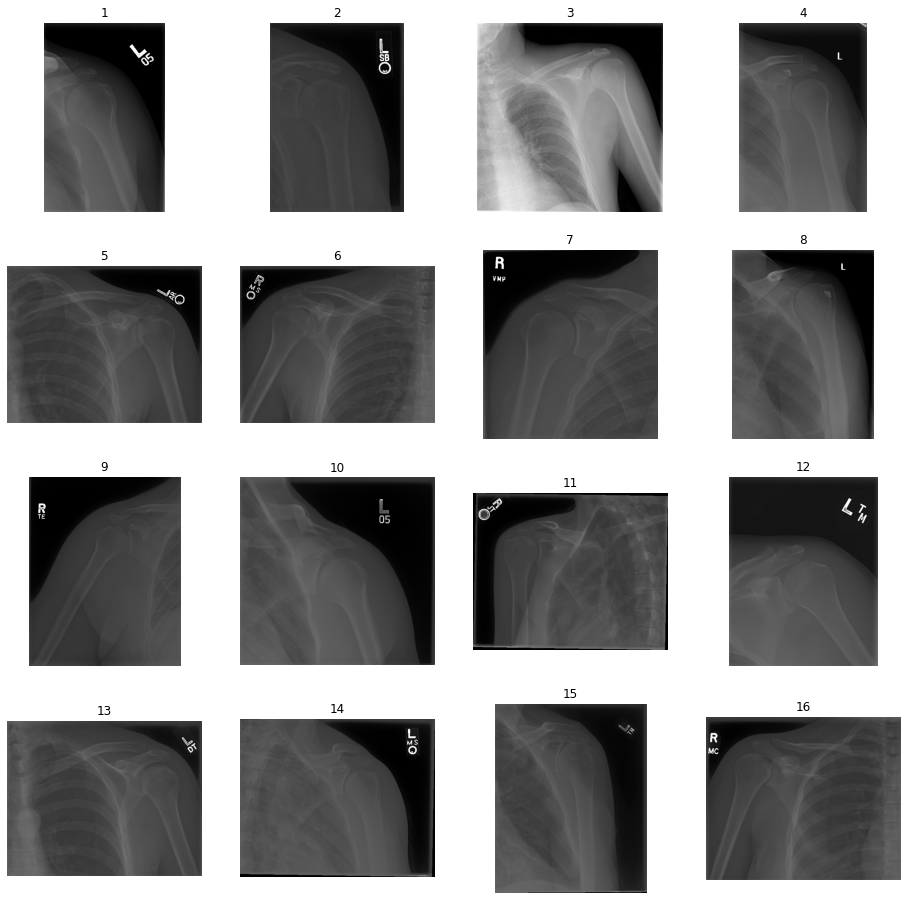

In [12]:
selected = np.random.choice(df_fns.values, 16, replace=False)

fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for i, (path, ax) in enumerate(zip(selected, axes.flatten())):
    img = cv2.imread('dataset_local/AP/train/' + path)[..., ::-1]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(i+1)
    print(f"{i+1}. {path}")
plt.show()

In [24]:
test_df = pd.read_csv("dataset_local/test_df.csv")

test_df_fns = test_df['#filename'].unique()

In [30]:
test_exc = [path for path in valid if path not in test_df_fns]
len(test_exc)

53

In [31]:
995+53

1048

In [32]:
len(train), len(valid)

(2173, 146)

In [33]:
285 - 146

139